#Flight Fare Prediction

In [ ]:
#importing libraries
import numpy as np              #for calculation of matrices,linear algebra
import pandas as pd              #for data manipulation and data analysis            
import matplotlib.pyplot as plt    #for data visualization
import seaborn as sns              #for making statistical graphics            

sns.set()

##Train dataset

In [ ]:
#using read_excel method for reading dataset because dataset is in excel format
train_data = pd.read_excel("/content/Data_Train.xlsx")          

In [ ]:
# to know the no.of rows&columns
train_data.shape        

(10683, 11)

In [ ]:
#for displaying maximun no.of columns of dataset
pd.set_option('display.max_columns',None)           

In [ ]:
#top 5 rows of dataset
train_data.head()            

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
#bottom 5 rows of dataset
train_data.tail()         

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
#displaying information about dataset
train_data.info()                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
 #for displaying statistical information of data(mean,median,standard deviation)
train_data.describe()          

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
#counts of duration in dataset
train_data["Duration"].value_counts()       

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
#dropping null values
train_data.dropna(inplace=True)                                                                                

In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data.shape

(10682, 11)

#EDA

###Extracting values from Date_of_Journey

In [ ]:
#Extracting day
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day      # .dt.day method will extract only day of that date

#Extracting month
train_data["Journey_month"] = pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month      # .dt.day method will extract only month of that date

#Extracting year
train_data["Journey_year"] = pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.year        # .dt.day method will extract only year of that date

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [ ]:
#since we have converted Date_of_Journey column into integers,so no need to use that column again...for that we have to drop that column.

train_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


###Extracting values from Dep_Time

In [ ]:
#Extracting hours
train_data["Dep_hour"] = pd.to_datetime(train_data.Dep_Time).dt.hour      # .dt.hour method will extract only hour of that date

#Extracting minutes
train_data["Dep_min"] = pd.to_datetime(train_data.Dep_Time).dt.minute      # .dt.minute method will extract only minute of that date

#since we have converted Dep_Time column into integers,so no need to use that column again...for that we have to drop that column.
train_data.drop(["Dep_Time"],axis=1,inplace=True)


In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


###Extracting values from Arrival_Time

In [ ]:
#Extracting hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour      # .dt.hour method will extract only hour of that date

#Extracting minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute      # .dt.minute method will extract only minute of that date

#since we have converted Dep_Time column into integers,so no need to use that column again...for that we have to drop that column.
train_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [ ]:
#Assigning and Converting Duration column into list
duration = list(train_data.Duration)

for i in range(len(duration)):
  if len(duration[i].split()) !=2:              #check if duration contains only hour or min
    if "h" in duration[i]:
      duration[i] = duration[i].strip() + " 0m"   #adds 0 minute
    else:
      duration[i] = "0h " + duration[i]           #adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = "h")[0]))                 #extract hours from duration
  duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))       #extract only minutes from duration

In [ ]:
#Adding duration_hours and duration_mins list to train_data dataframe
train_data["Duration_hours"]=duration_hours
train_data["Duration_mins"]=duration_mins

In [ ]:
#since we have converted Duration to hours and mins separately,so no need to use that column again...for that we have to drop that column.
train_data.drop(["Duration"],axis=1,inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


#Handling Categorical Data



1.Nominal data --> data are not in any order --> OneHotEncoder is used in this case

2.Ordinal data --> data are in order --> LabelEncoder is used in this case

In [ ]:
#counts of Airline in dataset
train_data["Airline"].value_counts()       

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

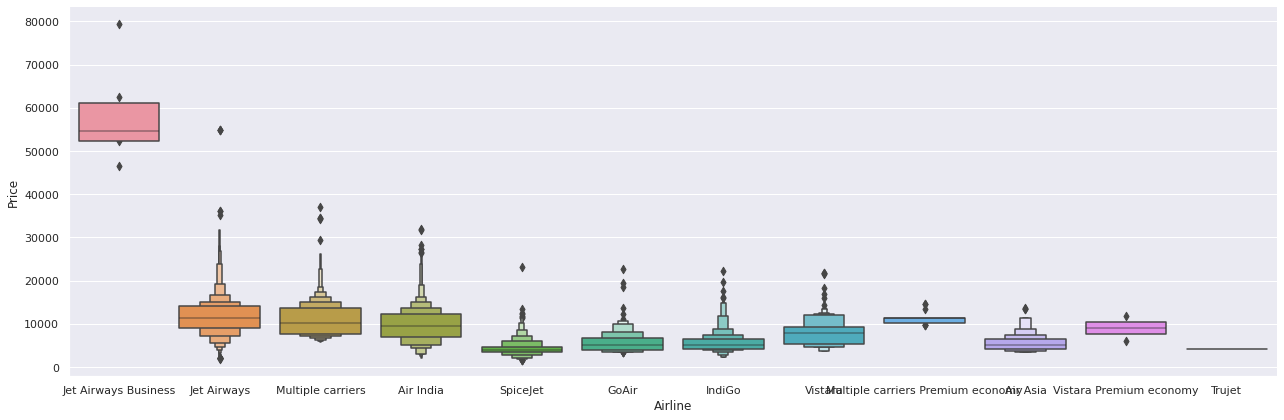

In [ ]:
#Airline vs Price
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()  

In [ ]:
#As Airline is Nominal Categorical data we have to perform OneHotEncoding

Airline=train_data[["Airline"]]

Airline=pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#counts of Source in dataset
train_data["Source"].value_counts()       

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

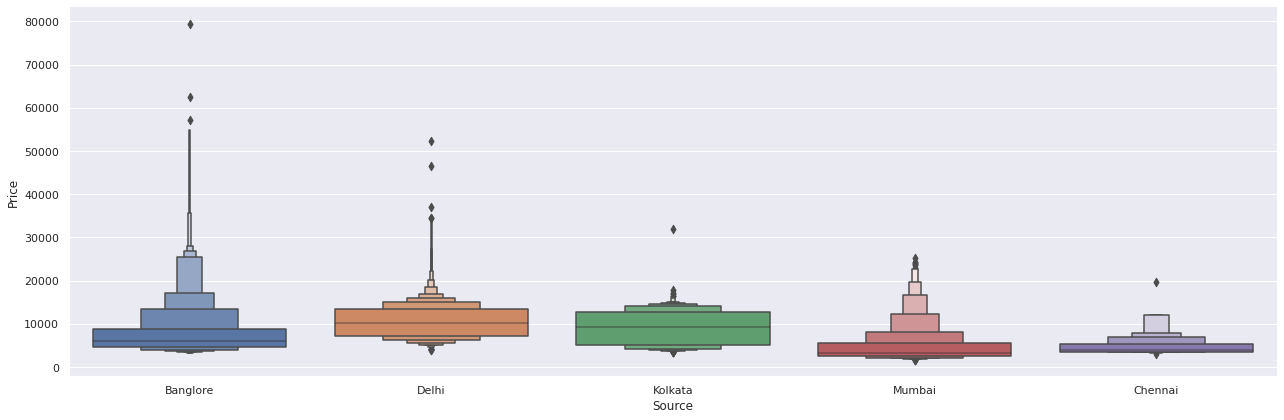

In [ ]:
#Source vs Price
sns.catplot(y="Price",x="Source",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()  

In [ ]:
#As Source is Nominal Categorical data we have to perform OneHotEncoding

Source=train_data[["Source"]]

Source=pd.get_dummies(Source,drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
#counts of Destination in dataset
train_data["Destination"].value_counts()       

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

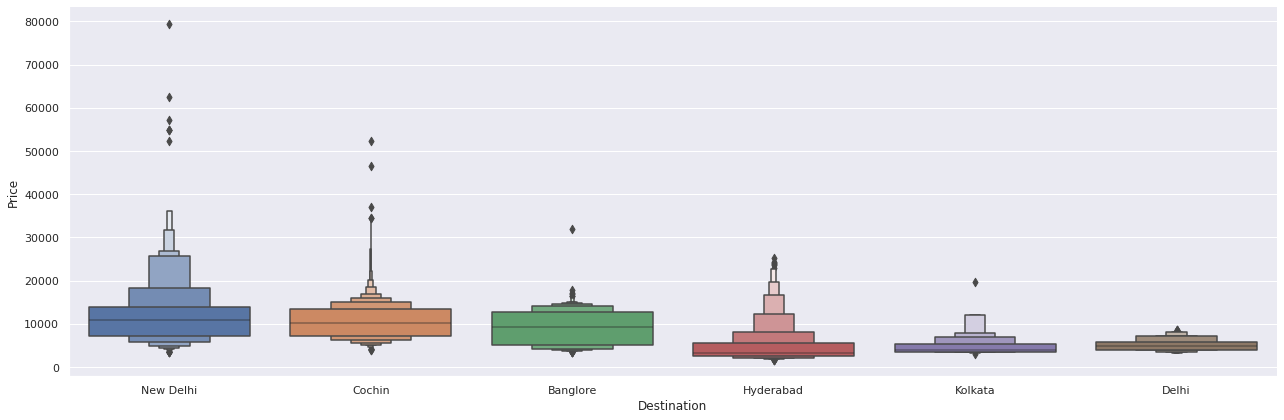

In [ ]:
#Destination vs Price
sns.catplot(y="Price",x="Destination",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [ ]:
#As Destination is Nominal Categorical data we have to perform OneHotEncoding

Destination=train_data[["Destination"]]

Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [ ]:
#As Additional_Info contains almost 80% no_info
#As Route and Total_Stops are related to each other, we have to drop these two(Route,Additional_Info)

train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
#counts of Total_Stops in dataset
train_data["Total_Stops"].value_counts()       

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
#As this is case of Ordinal Categorical type we have to perform LabelCoder
#Here values are assigned with corresponding keys

train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
#Concatenate dataframe --> train_data + Airline + Source + Destination

train_data=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [ ]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#since we have concatenated Airline,Source,Destination....so no need to use that column again...for that we have to drop that column.
train_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [ ]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_data.shape

(10682, 31)

##Test dataset

In [ ]:
test_data=pd.read_excel("/content/Test_set.xlsx")

In [ ]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
#Preprocessing

print("Test data info")
print("-"*75)
print(test_data.info())

print()
print()
print()

print("Null values:" )
print("-"*75)
test_data.dropna(inplace=True)
print(test_data.isnull().sum())

Test data info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None



Null values:
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [ ]:
#EDA

#1.Date_of_Journey
#Extracting day
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day     
#Extracting month
test_data["Journey_month"] = pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.month      
#Extracting year
test_data["Journey_year"] = pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.year

#since we have converted Date_of_Journey column into integers,so no need to use that column again...for that we have to drop that column.
test_data.drop(["Date_of_Journey"],axis=1,inplace=True)




#2.Dep_Time
#Extracting hours
test_data["Dep_hour"] = pd.to_datetime(test_data.Dep_Time).dt.hour      
#Extracting minutes
test_data["Dep_min"] = pd.to_datetime(test_data.Dep_Time).dt.minute      
#since we have converted Dep_Time column into integers,so no need to use that column again...for that we have to drop that column.
test_data.drop(["Dep_Time"],axis=1,inplace=True)



#3.Arrival_Time
#Extracting hours
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour      
#Extracting minutes
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute      
#since we have converted Dep_Time column into integers,so no need to use that column again...for that we have to drop that column.
test_data.drop(["Arrival_Time"],axis=1,inplace=True)






#Assigning and Converting Duration column into list
duration = list(test_data.Duration)

for i in range(len(duration)):
  if len(duration[i].split()) !=2:              #check if duration contains only hour or min
    if "h" in duration[i]:
      duration[i] = duration[i].strip() + " 0m"   #adds 0 minute
    else:
      duration[i] = "0h " + duration[i]           #adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = "h")[0]))                 #extract hours from duration
  duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))       #extract only minutes from duration





#Adding duration_hours and duration_mins list to train_data dataframe
test_data["Duration_hours"]=duration_hours
test_data["Duration_mins"]=duration_mins
#since we have converted Duration to hours and mins separately,so no need to use that column again...for that we have to drop that column.
test_data.drop(["Duration"],axis=1,inplace=True)

In [ ]:

#Categorical data
print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())       #counts of Airline in dataset
Airline=pd.get_dummies(test_data.Airline,drop_first=True)




print()
print()
print()



print("Source")
print("-"*75)
print(test_data["Source"].value_counts())      #counts of Source in dataset
Source=pd.get_dummies(test_data.Source,drop_first=True)


print()
print()
print()



print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())       #counts of Destination in dataset
Destination=pd.get_dummies(test_data.Destination,drop_first=True)

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64



Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64



Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [ ]:

#As Additional_Info contains almost 80% no_info
#As Route and Total_Stops are related to each other, we have to drop these two(Route,Additional_Info)
test_data.drop(["Route","Additional_Info"],axis=1,inplace=True)




test_data["Total_Stops"].value_counts()       #counts of Total_Stops in dataset
#As this is case of Ordinal Categorical type we have to perform LabelCoder
#Here values are assigned with corresponding keys
test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)




#Concatenate dataframe --> train_data + Airline + Source + Destination
test_data=pd.concat([test_data,Airline,Source,Destination],axis=1)


#since we have concatenated Airline,Source,Destination....so no need to use that column again...for that we have to drop that column.
test_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [ ]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,2019,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,2019,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,2019,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,2019,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2019,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
test_data.shape

(2671, 29)

#Feature Selection

In [ ]:
#Finding out the best feature which will contribute and have good relation with target variable
# 1. Heatmap
# 2. feature_importances_
# 3. SelectKBest

In [ ]:
train_data.shape

(10682, 31)

In [ ]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
X = train_data.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]


X.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
Y = train_data.iloc[:,1]
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

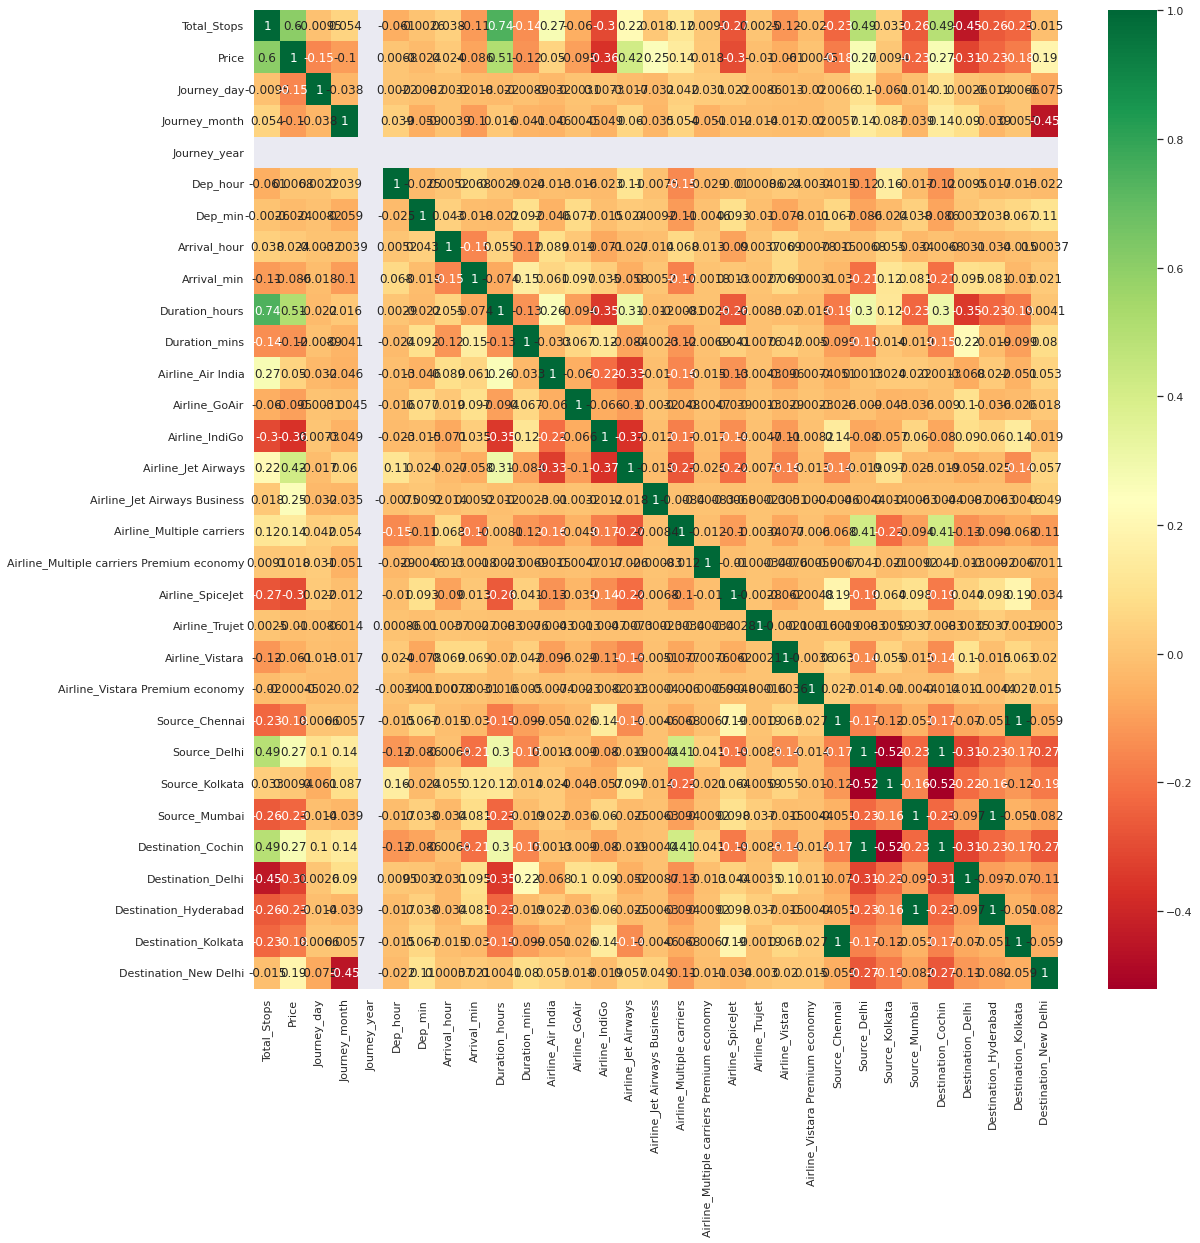

In [ ]:
#Finding correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")

plt.show()

In [ ]:
#Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

In [ ]:
print(selection.feature_importances_)

[2.37274059e-01 1.43717355e-01 5.37475439e-02 0.00000000e+00
 2.47657282e-02 2.10155278e-02 2.78461352e-02 1.92263242e-02
 1.16727270e-01 1.72815570e-02 1.01646651e-02 2.02259661e-03
 1.64856193e-02 1.42430678e-01 6.69210369e-02 1.95520217e-02
 8.17074643e-04 2.85723662e-03 9.55193209e-05 5.17140485e-03
 8.58622023e-05 4.48551163e-04 7.77337591e-03 3.05664412e-03
 5.54494590e-03 7.71779334e-03 1.44217725e-02 7.40719329e-03
 5.11298410e-04 2.49132093e-02]


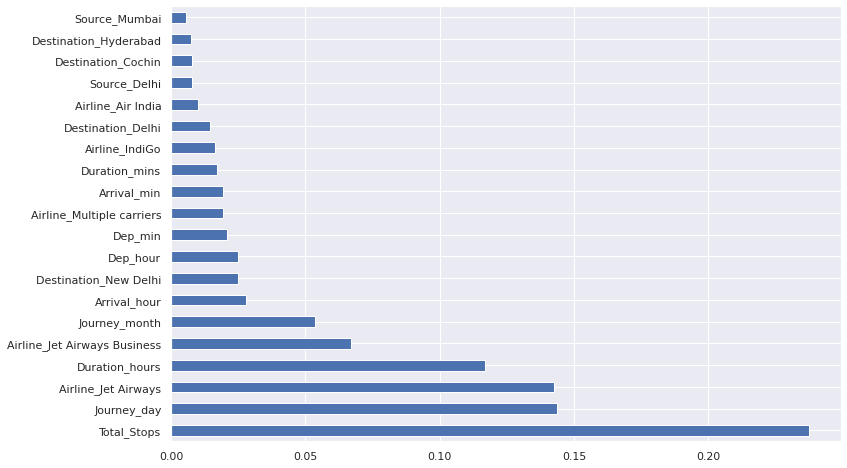

In [ ]:
#Plotting graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#Fitting model using Random Forest

In [ ]:
#1.Split dataset into train and test set in order to predict w.r.t X_test
#2.If needed do scaling of data(scaling is not done in Random Forest)
#3.Import model
#4.Fit the data
#5.Predict w.r.t X_test
#6.In regression check RSME score
#7.Plot graph

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

##RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
Y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_test,Y_test)

0.7564317608156014

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


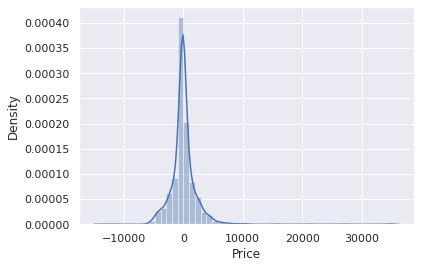

In [ ]:
sns.distplot(Y_test-Y_pred)

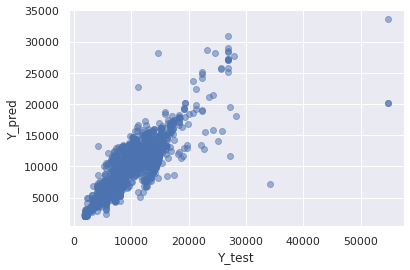

In [ ]:
plt.scatter(Y_test,Y_pred,alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()            

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:',metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE:',metrics.mean_squared_error(Y_test,Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MAE: 1280.2698492820678
MSE: 5495818.9586934615
RMSE: 2344.3163094372444


In [ ]:
metrics.r2_score(Y_test,Y_pred)

0.7564317608156014

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
reg_lr = lr.fit(X_train,Y_train)
Y_pred = reg_lr.predict(X_test)
print("scale of training data -----",reg_lr.score(X_train,Y_train))
print("scale of testing data -----",reg_lr.score(X_test,Y_test))

scale of training data ----- 0.6459186852951919
scale of testing data ----- 0.5388397919130619


##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
reg_dt = dt.fit(X_train,Y_train)
Y_pred = reg_dt.predict(X_test)
print("scale of training data -----",reg_dt.score(X_train,Y_train))
print("scale of testing data -----",reg_dt.score(X_test,Y_test))


scale of training data ----- 0.9702971209443234
scale of testing data ----- 0.7002461371156992


##AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb = DecisionTreeRegressor()
reg_adb = adb.fit(X_train,Y_train)
Y_pred = reg_adb.predict(X_test)
print("scale of training data -----",reg_adb.score(X_train,Y_train))
print("scale of testing data -----",reg_adb.score(X_test,Y_test))


scale of training data ----- 0.9702971209443234
scale of testing data ----- 0.6963813970103523


##Hyperparameter Tuning

In [ ]:
#1.choosing method for hyperparameter tuning from RandomizedSearchCV and GridSearchCV
#2.Assigning hyperparameters in the form of dictionary
#3.Fitting the model
#4.Check best parameters and best score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#RandomizedSearchCV


#1.Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#2.Number of features to consider at every split
max_features = ['auto','sqrt']
#3.Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#4.Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#5.Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [ ]:
#Creating the random grid

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf
               }

In [ ]:
#Random search of parameters,using 5 fold cross validation
#Search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf,param_distributions = random_grid,scoring = 'neg_mean_squared_error',n_iter = 10,cv = 5,verbose = 2,random_state = 42,n_jobs = 1)

In [ ]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [ ]:
prediction = rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


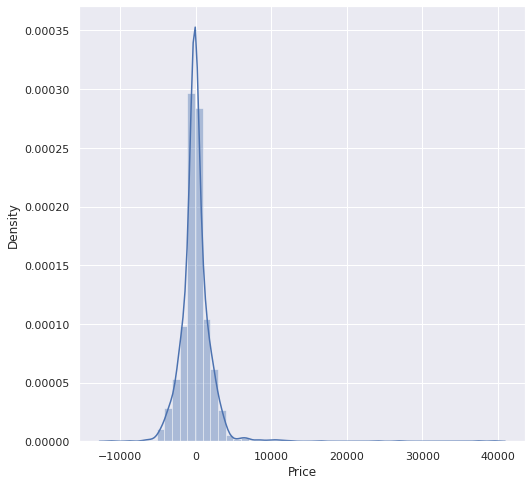

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-prediction)
plt.show()

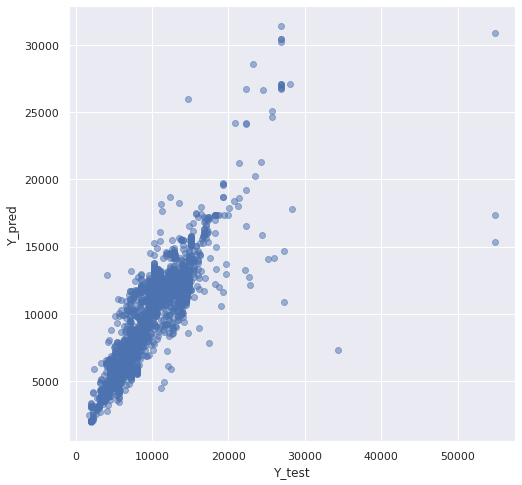

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(Y_test,prediction,alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show() 

In [ ]:
print('MAE:',metrics.mean_absolute_error(Y_test,prediction))
print('MSE:',metrics.mean_squared_error(Y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

MAE: 1245.3176918769695
MSE: 5356845.618716678
RMSE: 2314.4860377018217


###Save the model to reuse it again

In [ ]:
import pickle

#open a file,where you want to store the data
file = open('flight_rf.pkl','wb')

#dump information to that file
pickle.dump(rf_random,file)

In [ ]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [ ]:
Y_prediction = forest.predict(X_test)

In [ ]:
metrics.r2_score(Y_test,Y_prediction)

0.7625908959629074